In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from pmdarima import auto_arima

import seaborn as sns

sns.set()

%matplotlib inline

In [33]:
df1 = pd.read_csv("DailyTotalFemaleBirths.csv", index_col="Date", parse_dates=True)
df1.index.freq = "D"

In [34]:
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [35]:
df2 = pd.read_csv('TradeInventories.csv', index_col="Date", parse_dates=True)
df2.index.freq = 'MS'

In [36]:
df2.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


<AxesSubplot:xlabel='Date'>

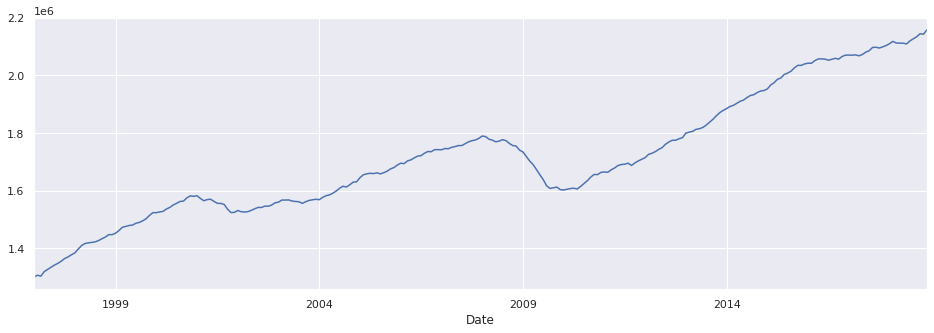

In [37]:
df2["Inventories"].plot(figsize=(16, 5))

In [39]:
auto_arima(
    df2["Inventories"],
    seasonal=False,
    trace=True,
    start_p=0,
    start_q=0,
    max_p=2,
    max_q=2,
    error_action="ignore",
    stepwise=True
).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.422 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 27 Apr 2021   AIC                           5348.037
Time:                        16:09:25   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [60]:
model = ARIMA(train, order=(1, 1, 1))
fit_result = model.fit()
fit_result.summary()

/home/monko/.virtualenvs/machine_learning/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2550.300
Date:                Tue, 27 Apr 2021   AIC                           5106.601
Time:                        16:24:34   BIC                           5117.177
Sample:                    01-01-1997   HQIC                          5110.857
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    881.150      0.000       0.998       1.002
ma.L1         -0.9999      0.040    -24.838      0.000      -1.079      -0.921
sigma2      3.906e+07   1.63e-10    2.4e+17      0.000    3.91e+07    3.91e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):                99.43
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -1.17
Prob(H) (two-sided):                  0.19   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.87e+33. Standard errors may be unstable.
"""

In [64]:
start = len(train)
end = len(train) + len(test) - 1
predictions = fit_result.predict(start=start, end=end, dynamic=False, typ='levels').rename(
    "ARIMA(1,1,1) predictions"
)

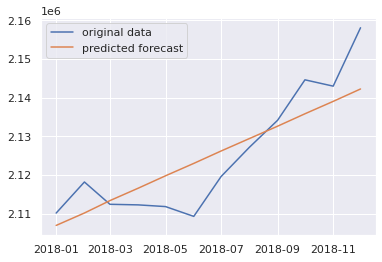

In [65]:
plt.plot(predictions.index, test.values, label='original data')
plt.plot(predictions.index, predictions.values, label='predicted forecast')
plt.legend()

<AxesSubplot:title={'center':'title'}, xlabel='Date'>

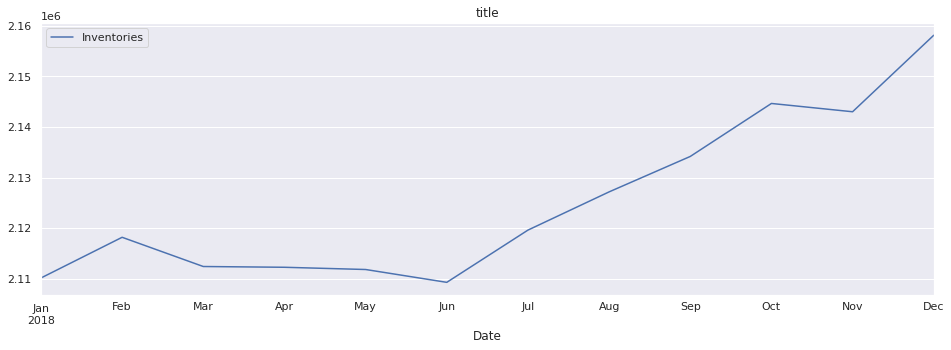

In [66]:
test['Inventories'].plot(legend=True, title='title', figsize=(16,5))